# Proyecto 04 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

## Mejora Proyecto Serie de Tiempo

Como mejora para este proyecto se procedera a predecir el flujo vehicular por unidades de peaje AUSA, con la forma de pago efectivo para el año 2020, utilizando modelos que no se manejaron durante los diferentes sprint, se utilizará el modelo de prediccion ARIMA, redes neuronales y posterior se comparara con algun modelo desarrollado en el proyecto 3, se incluirá adicional los datos del flujo vehicular efectivo para el 2020 y se determinará cual modelo tiene mejor comportamiento. 

### 1. Preparación del Dataset

In [1]:
#Librerias Necesarias
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import seaborn as sns
import datetime
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
#Importando datos
data_2020 = pd.read_csv('flujo-vehicular-2020 (1).csv', sep =',')
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')
data_2016 = pd.read_csv('flujo-vehicular-2016.csv', sep =',')

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [4]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [5]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


In [6]:
data_2016.info()
data_2016.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379443 entries, 0 to 1379442
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1379443 non-null  int64 
 1   fecha           1379443 non-null  object
 2   hora_inicio     1379443 non-null  int64 
 3   hora_fin        1379443 non-null  int64 
 4   dia             1379443 non-null  object
 5   estacion        1379443 non-null  object
 6   sentido         1379443 non-null  object
 7   tipo_vehiculo   1379443 non-null  object
 8   forma_pago      1379443 non-null  object
 9   cantidad_pasos  1379443 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.2+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2016,2016-01-01,0,1,Viernes,Alberdi,Centro,Liviano,NO COBRADO,32
1,2016,2016-01-01,0,1,Viernes,Alberdi,Centro,Liviano,AUPASS,9
2,2016,2016-01-01,1,2,Viernes,Alberdi,Centro,Liviano,NO COBRADO,1
3,2016,2016-01-01,1,2,Viernes,Alberdi,Centro,Liviano,EFECTIVO,4
4,2016,2016-01-01,1,2,Viernes,Alberdi,Centro,Liviano,EXENTO,3


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [7]:
#Valores del campo estación
print(data_2020['estacion'].unique())
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())
print(data_2016['estacion'].unique())

['ALBERDI' 'AVELLANEDA' 'DELLEPIANE LINIERSLEPIANE CENTRO'
 'DELLEPIANE LINIERS' 'ILLIA' 'ILP' 'PB1' 'PB3' 'PB4' 'RETIRO' 'SALGUERO'
 'SARMIENTO' 'PB2']
['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [8]:
#Valores del campo sentido
print(data_2020['sentido'].unique())
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())
print(data_2016['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [9]:
#Valores del campo tipo de vehiculo
print(data_2020['tipo_vehiculo'].unique())
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())
print(data_2016['tipo_vehiculo'].unique())

['Auto' 'Auto con trailer' 'Moto' 'N/D' 'Pago Doble Auto'
 'Pago Doble Auto con trailer / Pesado 2 Ejes' 'Pago doble Moto'
 'Pesados 2 Ejes' 'Pesados 3 Ejes' 'Pesados 4 Ejes' 'Pesados 5 Ejes'
 'Pesados 6 Ejes']
['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [10]:
#Valores del campo forma de pago
print(data_2020['forma_pago'].unique())
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())
print(data_2016['forma_pago'].unique())

['Efectivo' 'Rec.Deuda' 'Tarjeta Magnética' 'Tag' 'Exento' 'Violación'
 'CPP' 'Mercado Pago']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']
['NO COBRADO' 'AUPASS' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION' 'MONEDERO']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [11]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset0 = pd.concat([data_2019, data_2018, data_2017])
print(dataset0)
#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset0.estacion=='Illia', dataset0.forma_pago == 'EFECTIVO')
dataset = dataset0[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

         periodo       fecha  hora_inicio  hora_fin      dia    estacion  \
0           2019  2019-01-01            0         1   Martes     Alberti   
1           2019  2019-01-01            0         1   Martes     Alberti   
2           2019  2019-01-01            0         1   Martes     Alberti   
3           2019  2019-01-01            0         1   Martes     Alberti   
4           2019  2019-01-01            0         1   Martes  Avellaneda   
...          ...         ...          ...       ...      ...         ...   
1372640     2017  2017-12-31           22        23  Domingo   Sarmiento   
1372641     2017  2017-12-31           22        23  Domingo   Sarmiento   
1372642     2017  2017-12-31           22        23  Domingo   Sarmiento   
1372643     2017  2017-12-31           23         0  Domingo   Sarmiento   
1372644     2017  2017-12-31           23         0  Domingo   Sarmiento   

           sentido tipo_vehiculo  forma_pago  cantidad_pasos  
0           Centro      

C:\Users\Elsi\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


### Exploración de Datos

In [12]:
dataset.describe()

,hora_fin,cantidad_pasos
count,238869.000000,238869.000000
mean,11.874659,200.384232
std,6.739129,403.246904
min,0.000000,1.000000
25%,6.000000,2.000000
50%,12.000000,11.000000
75%,18.000000,104.000000
max,23.000000,2416.000000


In [13]:
dtset=dataset.copy()

In [14]:
dtset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [15]:
dia_semana = dtset.groupby(by="dia")["cantidad_pasos"].count().sort_values(ascending=False)
dia_semana

dia
Viernes      35196
Miércoles    35005
Jueves       34914
Martes       34335
Lunes        34144
Sábado       33351
Domingo      31924
Name: cantidad_pasos, dtype: int64

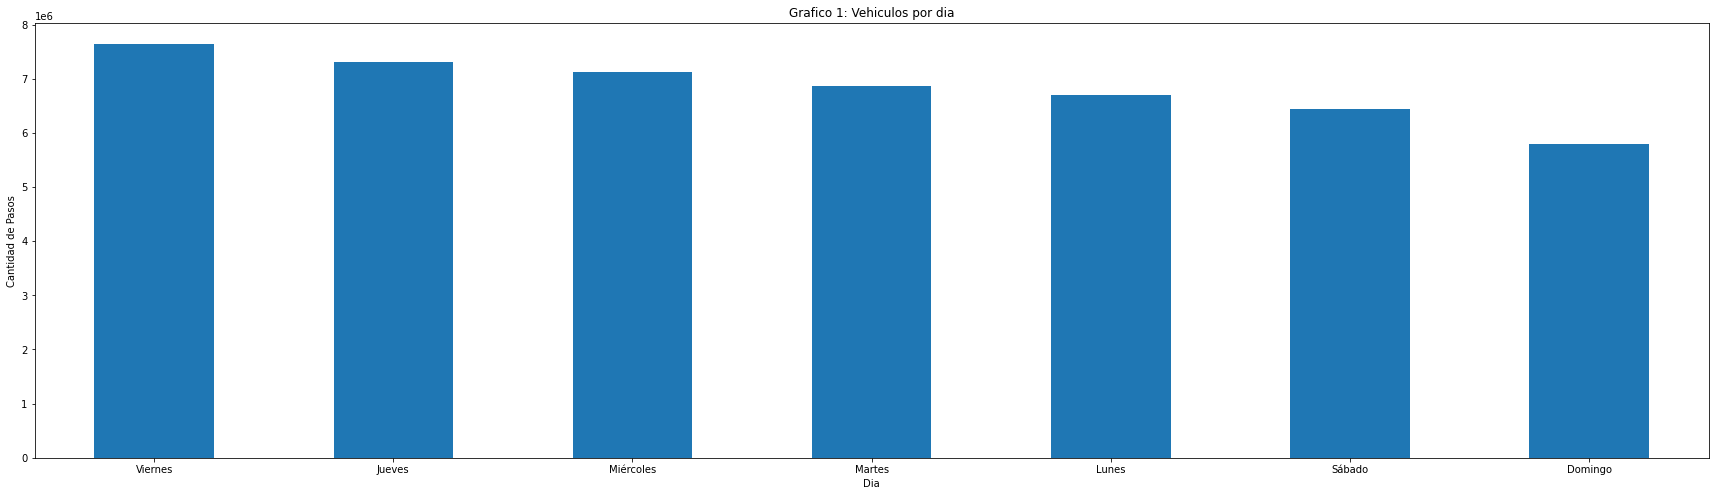

In [16]:
#Gráfico #1 Cantidad de Vehiculos por dia 
plt.figure(figsize = (30,8))
dtset.groupby(by="dia")["cantidad_pasos"].sum().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)
plt.xlabel('Dia')
plt.ylabel('Cantidad de Pasos')
plt.title('Grafico 1: Vehiculos por dia')
plt.show()

En el grafico 1, se puede observar la cantidad de vehiculos que pasaron para cada dia de la semana. Como conclusion los dias viernes pasaron mas vehiculos. 

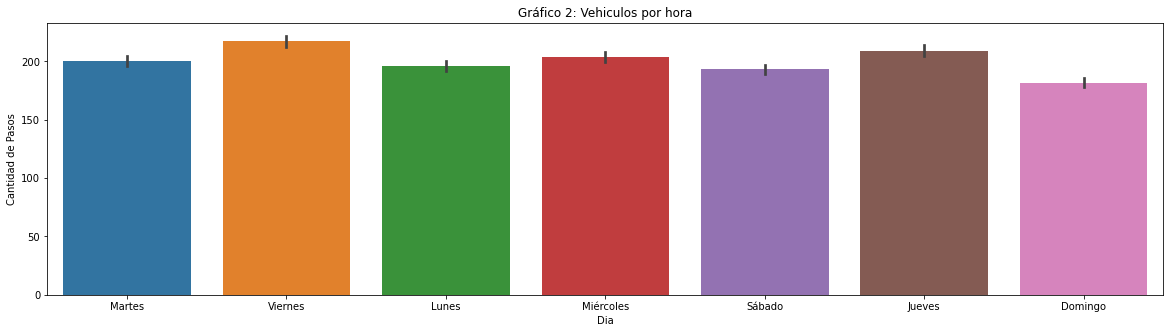

In [17]:
#Gráfico #2 Cantidad de vehiculos por hora
plt.figure(figsize = (20,5))
sns.barplot(x="dia", y="cantidad_pasos", data=dtset)
plt.xlabel('Dia')
plt.ylabel('Cantidad de Pasos')
plt.title('Gráfico 2: Vehiculos por hora')
plt.show()

In [18]:
hora_semana = dtset.groupby(by="dia")["cantidad_pasos"].mean().sort_values(ascending=False)
hora_semana

dia
Viernes      217.276736
Jueves       209.147305
Miércoles    203.557378
Martes       199.957798
Lunes        195.975486
Sábado       193.149081
Domingo      181.429677
Name: cantidad_pasos, dtype: float64

En el grafico #2 podemos observar el promedio de vehiculos que pasa por hora y cada dia de la semana, donde los dias viernes es el dia que mayor trafico se tiene por hora

Text(0.5, 1.0, 'Grafico 3: Horario de mayor trafico')

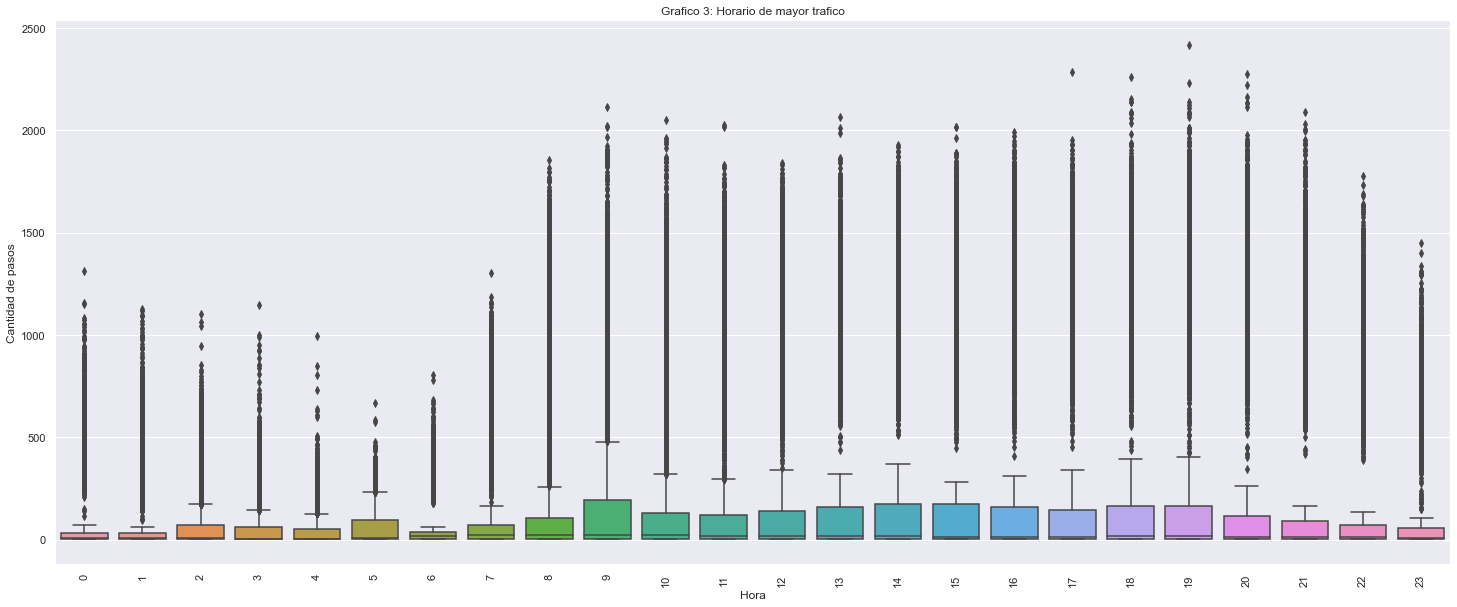

In [19]:
#Grafico 3: Horarios de mayor trafico
sns.set(context='notebook')
plt.figure(figsize=(25,10))
sns.boxplot(data=dtset,x="hora_fin",y="cantidad_pasos")
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.xlabel('Hora')
plt.ylabel('Cantidad de pasos')
plt.title('Grafico 3: Horario de mayor trafico')

In [20]:
hpico_semana = dtset.groupby(by="hora_fin")["cantidad_pasos"].mean().sort_values(ascending=False)
hpico_semana

hora_fin
18    292.162446
19    291.271219
14    277.472120
17    275.487347
15    270.507931
16    270.108059
13    266.592409
20    259.013817
12    248.350227
9     240.316418
11    235.385680
21    234.840325
10    234.804788
8     221.582036
22    194.626479
7     155.252432
23    148.907452
0     114.199093
1      98.943838
6      86.290241
2      71.034905
3      51.664223
5      48.822552
4      40.628488
Name: cantidad_pasos, dtype: float64

Del grafico 3, se puede concluir que los horarios de mayor trafico son las 18 horas y  las 19 horas

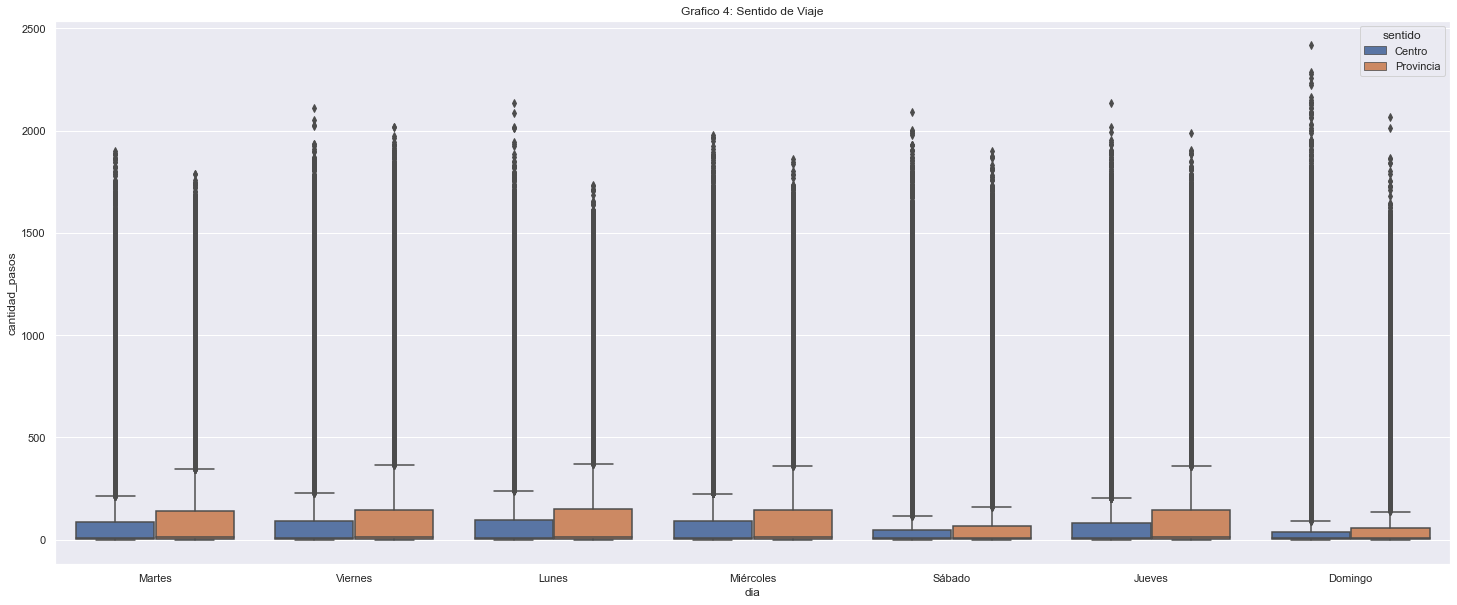

In [21]:
#Grafico 4 Boxplot Sentido en el que circulan los vehiculos
sns.set(context='notebook')
plt.figure(figsize=(25,10))
sns.boxplot(data=dtset,x="dia",y='cantidad_pasos',hue='sentido')
plt.title('Grafico 4: Sentido de Viaje')
plt.show()

Del grafico 4, se puede concluir que los vehiculos circulan con mayor frecuencia en sentido provincia

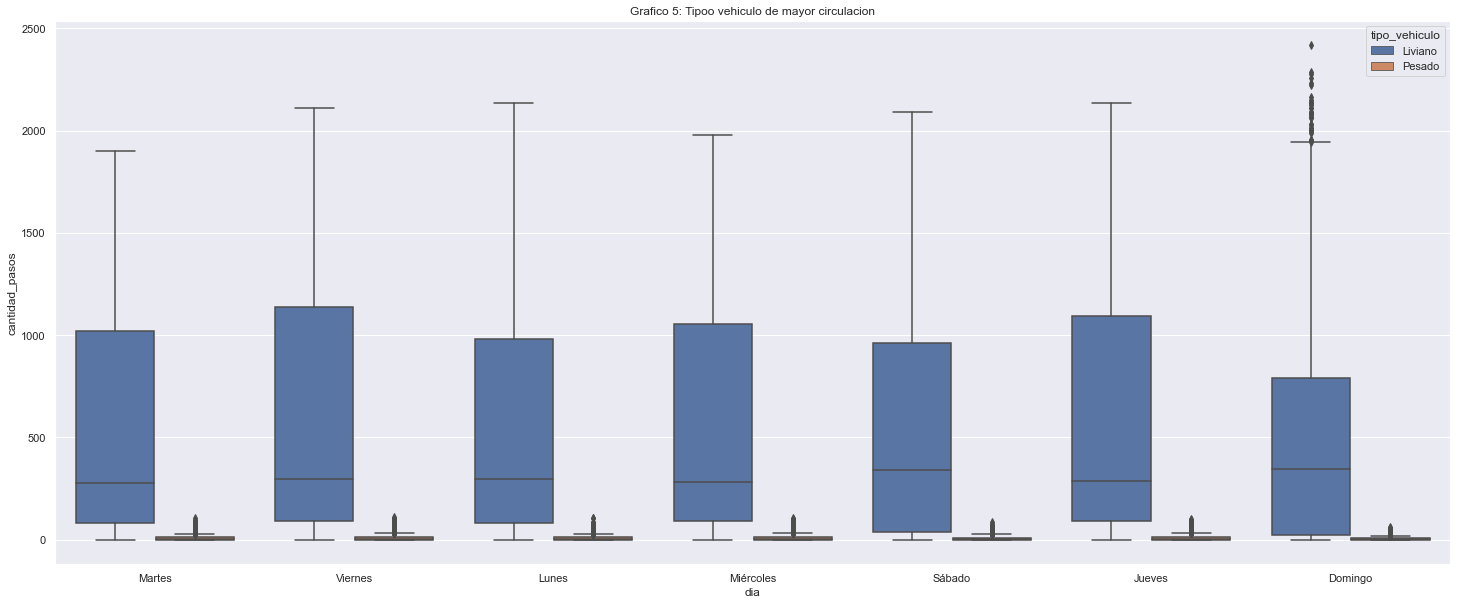

In [22]:
#Gráfico 5 Boxplot Tipo de vehiculo de mayor circulación 
sns.set(context='notebook')
plt.figure(figsize=(25,10))
sns.boxplot(data=dtset,x="dia",y='cantidad_pasos',hue='tipo_vehiculo')
plt.title('Grafico 5: Tipoo vehiculo de mayor circulacion')
plt.show()

Del grafico 5, se puede concluir que los vehiculos con mayor circulacion son los tipo liviano 

In [23]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.rename(columns = {'fecha':'fecha_original'}, inplace = True) 
dataset.drop(columns=['hora_fin'], inplace = True)

dataset.head()

<ipython-input-23-76ced8f85330>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')
C:\Users\Elsi\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\Elsi\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

,fecha_original,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,2019-01-01,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,2019-01-01,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,2019-01-01,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,2019-01-01,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,2019-01-01,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238869 entries, 80 to 1372326
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   fecha_original  238869 non-null  object        
 1   dia             238869 non-null  object        
 2   sentido         238869 non-null  object        
 3   tipo_vehiculo   238869 non-null  object        
 4   cantidad_pasos  238869 non-null  int64         
 5   fecha2          238869 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 20.8+ MB


In [25]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

C:\Users\Elsi\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,fecha_original,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,2019-01-01,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,2019-01-01,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,2019-01-01,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,2019-01-01,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,2019-01-01,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [26]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True, ascending=True)
dataset.reset_index(drop=True, inplace = True)
dataset

<ipython-input-26-bb8804ec6789>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.sort_values('fecha', inplace = True, ascending=True)


,fecha_original,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,2017-01-01,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,2017-01-01,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,2017-01-01,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,2017-01-01,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,2017-01-01,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...,...
238864,2019-12-31,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,2019-12-31,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,2019-12-31,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,2019-12-31,Martes,Centro,Liviano,214,2019-12-31 23:00:00


In [27]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


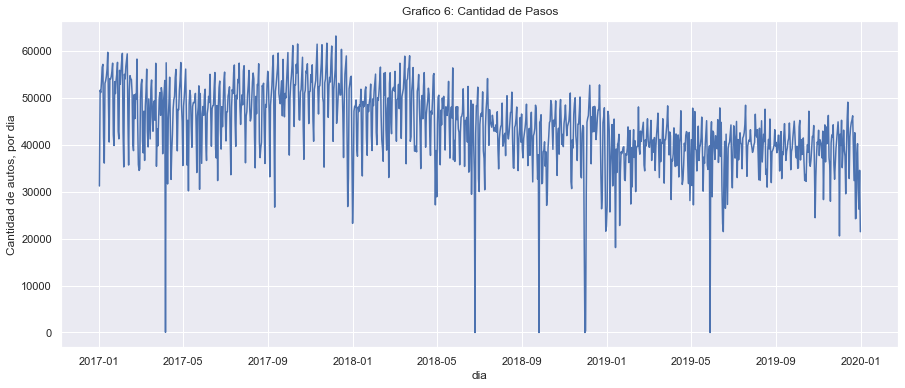

In [28]:
#Gráfico #6
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('dia')
plt.ylabel('Cantidad de autos, por dia')
plt.title('Grafico 6: Cantidad de Pasos')
plt.show()

Del grafico #6 se puede observar que existe dias donde no se tiene informacion, por lo que se procedera a imputar valores para esos dias 

In [29]:
# Hay dias faltantes?
from datetime import timedelta
import datetime as dt
from datetime import datetime

arrDayOfWeek={0:'Domingo', 1:'Lunes', 2:'Martes', 3:'Miercoles', 4:'Jueves', 5:'Viernes', 6:'Sabado'}
def datetime_range(start=None, end=None):
    while start < end:
        ## existe ese dia?
        temp = dataset[(dataset.fecha == start)]
        if temp.empty:
            # No existe este dia, lo agregamos en null
            dds = int(start.strftime("%w"))
            dia_de_la_semana = arrDayOfWeek[dds]
            
            dia_anterior = start - timedelta(days=1)
            s_dia_anterior = dia_anterior.strftime("%Y-%m-%d")
            cantidad_anterior = dataset.cantidad_pasos[(dataset.fecha_original == s_dia_anterior)].sum()
            
            dia_siguiente  = start + timedelta(days=1)
            s_dia_siguiente = dia_siguiente.strftime("%Y-%m-%d")
            cantidad_siguiente = dataset.cantidad_pasos[(dataset.fecha_original == s_dia_siguiente)].sum()
            
            promedio = (cantidad_anterior + cantidad_siguiente) / 2
            fecha_original = start.strftime("%Y-%m-%d")
            
            ## Calcular directamente el promedio de los dias adyacentes
            dataset.loc[dataset.shape[0]] = [fecha_original, dia_de_la_semana, 'Provincia','Liviano', promedio, start] 
            print("Añadido el dia: ", start, promedio)
            
        start = start + timedelta(days=1)
        
datetime_range(start=datetime.strptime('2017-01-01', "%Y-%m-%d"), end=datetime.strptime('2019-12-31', "%Y-%m-%d"))


C:\Users\Elsi\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


Añadido el dia:  2017-04-06 00:00:00 55537.0
Añadido el dia:  2017-11-04 00:00:00 48845.5
Añadido el dia:  2018-06-25 00:00:00 38312.5
Añadido el dia:  2018-09-25 00:00:00 41299.5
Añadido el dia:  2018-11-10 00:00:00 40806.0
Añadido el dia:  2018-11-29 00:00:00 21862.0
Añadido el dia:  2018-11-30 00:00:00 20970.0
Añadido el dia:  2019-02-11 00:00:00 39980.0
Añadido el dia:  2019-05-29 00:00:00 40353.5
Añadido el dia:  2019-12-24 00:00:00 33440.0


In [30]:
dataset.drop(columns=['fecha_original'], inplace = True)

C:\Users\Elsi\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [31]:
dataset.describe()

,cantidad_pasos
count,238879.000000
mean,201.972492
std,476.599324
min,1.000000
25%,2.000000
50%,11.000000
75%,104.000000
max,55537.000000


In [32]:
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1.0,2017-01-01
1,Domingo,Provincia,Liviano,9.0,2017-01-01
2,Domingo,Provincia,Liviano,644.0,2017-01-01
3,Domingo,Provincia,Pesado,6.0,2017-01-01
4,Domingo,Provincia,Pesado,1.0,2017-01-01


In [33]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
semanal = dataset.resample('W', on = 'fecha').sum()
print(semanal.shape)
semanal.head()

(158, 1)


,cantidad_pasos
fecha,
2017-01-01,31183.0
2017-01-08,347212.0
2017-01-15,366413.0
2017-01-22,357215.0
2017-01-29,354581.0


In [34]:
semanal.tail()

,cantidad_pasos
fecha,
2019-12-08,282891.0
2019-12-15,272960.0
2019-12-22,292881.0
2019-12-29,259830.0
2020-01-05,55970.0


In [35]:
semanal.head()

,cantidad_pasos
fecha,
2017-01-01,31183.0
2017-01-08,347212.0
2017-01-15,366413.0
2017-01-22,357215.0
2017-01-29,354581.0


In [36]:
semanal.reset_index(inplace = True)

In [37]:
#Descartando semanas incompletas
semanal = semanal[(semanal['fecha'] >= "2017-01-09") & (semanal['fecha'] <= "2019-12-29")]

In [38]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
semanal = semanal.resample('W', on = 'fecha').sum()
print(semanal.shape)
semanal.head()

(155, 1)


,cantidad_pasos
fecha,
2017-01-15,366413.0
2017-01-22,357215.0
2017-01-29,354581.0
2017-02-05,359401.0
2017-02-12,363774.0


279304.5 335271.0 55966.5 195354.75 419220.75


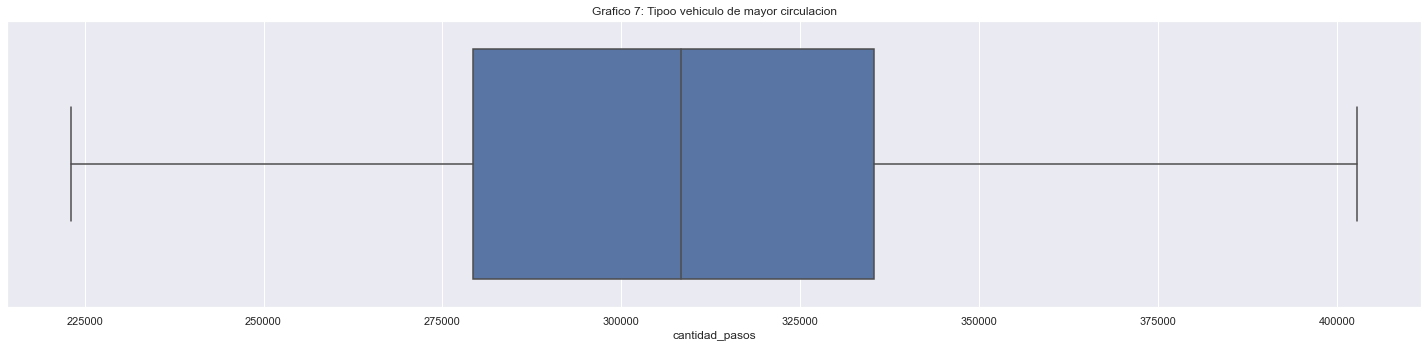

In [39]:
#Grafico 7 Boxplot Deteccion de outliers
from numpy import percentile
sns.set(context='notebook')
plt.figure(figsize=(20, 5))
q25,q75 = percentile(semanal['cantidad_pasos'], 25), percentile(semanal['cantidad_pasos'], 75)
iqr = q75-q25
minimo = q25-(1.5*iqr)
maximo = q75+(1.5*iqr)
print(q25,q75,iqr, minimo, maximo)
sns.boxplot(data=semanal,x='cantidad_pasos')
#plt.xlim([minimo, maximo])
plt.title('Grafico 7: Tipoo vehiculo de mayor circulacion')
plt.tight_layout()
plt.show()

In [40]:
semanal.describe()

,cantidad_pasos
count,155.000000
mean,308468.529032
std,35742.270033
min,223160.000000
25%,279304.500000
50%,308307.000000
75%,335271.000000
max,402792.500000


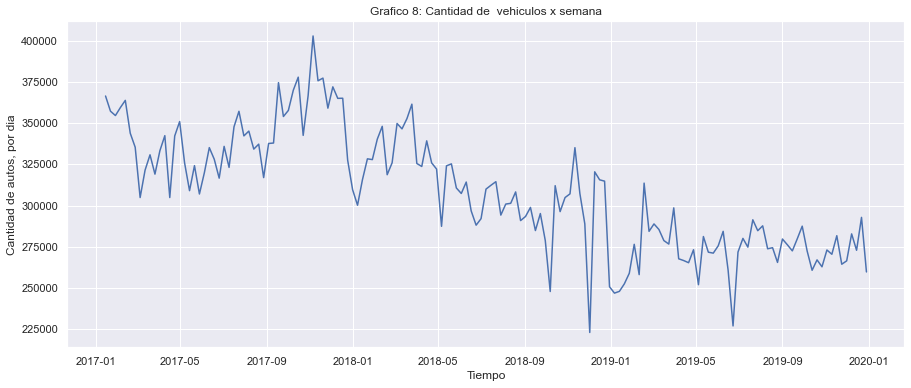

In [41]:
#Gráfico #8 Serie completa-Resemple Semanal
plt.figure(figsize = (15,6))
plt.plot(semanal.index, semanal.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.title('Grafico 8: Cantidad de  vehiculos x semana')
plt.show()

Del grafico # 8, se puede observar que durante el primer semestre del 2019 esta modalidad de pago tuvo una fuerte caida

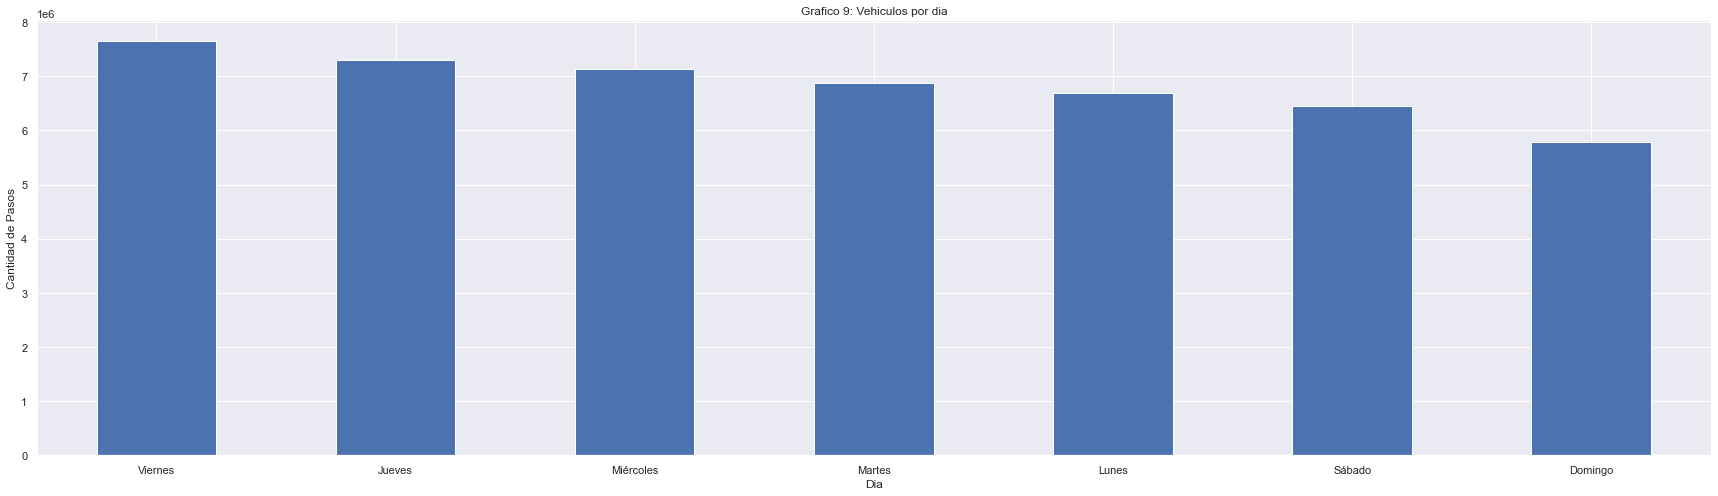

In [42]:
#Gráfico #9
plt.figure(figsize = (30,8))
dtset.groupby(by="dia")["cantidad_pasos"].sum().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)
plt.xlabel('Dia')
plt.ylabel('Cantidad de Pasos')
plt.title('Grafico 9: Vehiculos por dia')
plt.show()

In [43]:
print(semanal.isna().sum())
semanal = semanal.interpolate()
print(semanal.isna().sum())

cantidad_pasos    0
dtype: int64
cantidad_pasos    0
dtype: int64


In [44]:
ventana = int(365/7)
semanal_promedio_tendencia = semanal.cantidad_pasos.rolling(window=ventana, center = True).mean()
semanal_promedio_tendencia

fecha
2017-01-15   NaN
2017-01-22   NaN
2017-01-29   NaN
2017-02-05   NaN
2017-02-12   NaN
              ..
2019-12-01   NaN
2019-12-08   NaN
2019-12-15   NaN
2019-12-22   NaN
2019-12-29   NaN
Freq: W-SUN, Name: cantidad_pasos, Length: 155, dtype: float64

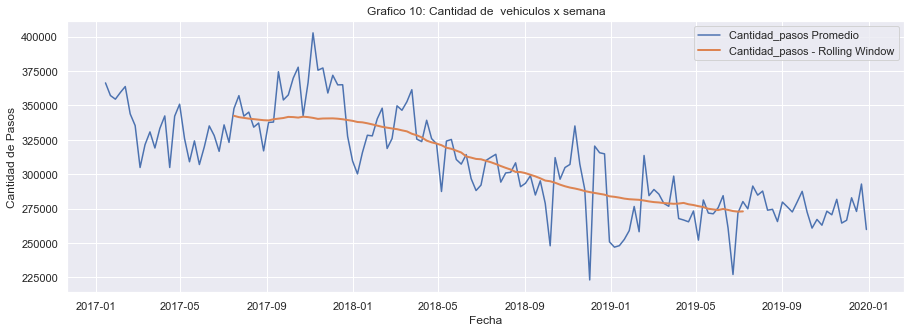

In [45]:
#Gráfico #10
plt.figure(figsize = (15,5))
plt.plot(semanal.index, semanal.cantidad_pasos, label = 'Cantidad_pasos Promedio')
plt.plot(semanal_promedio_tendencia, lw = 2, label = 'Cantidad_pasos - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasos')
plt.title('Grafico 10: Cantidad de  vehiculos x semana')
plt.legend()
plt.show()

## Tendencia Lineal

In [46]:
import datetime

In [47]:
semanal['fecha_numeros']=semanal.index.map(datetime.datetime.toordinal)
semanal.head()

,cantidad_pasos,fecha_numeros
fecha,,
2017-01-15,366413.0,736344
2017-01-22,357215.0,736351
2017-01-29,354581.0,736358
2017-02-05,359401.0,736365
2017-02-12,363774.0,736372


In [48]:
#Modelo de regresion lineal 
lr = LinearRegression()
lr.fit(semanal.fecha_numeros.values.reshape(-1, 1), semanal.cantidad_pasos)

LinearRegression()

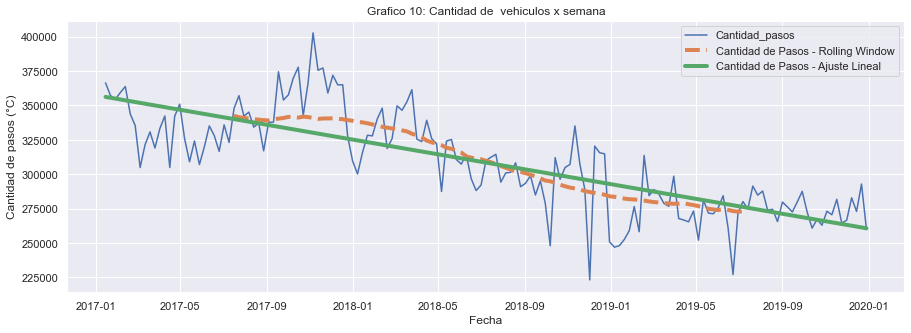

In [49]:
#Grafico #10
plt.figure(figsize = (15,5))
plt.plot(semanal.index, semanal.cantidad_pasos, label = 'Cantidad_pasos')
plt.plot(semanal_promedio_tendencia, ls = '--', lw = 4, label = 'Cantidad de Pasos - Rolling Window')
plt.plot(semanal.index, lr.predict(semanal.fecha_numeros.values.reshape(-1, 1)), lw = 4, label = 'Cantidad de Pasos - Ajuste Lineal')
# plt.xlim(datetime.date(1985,1,1), datetime.date(2018,1,1))
# plt.ylim([0,30])
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos (°C)')
plt.title('Grafico 10: Cantidad de  vehiculos x semana')
plt.legend()
plt.show()

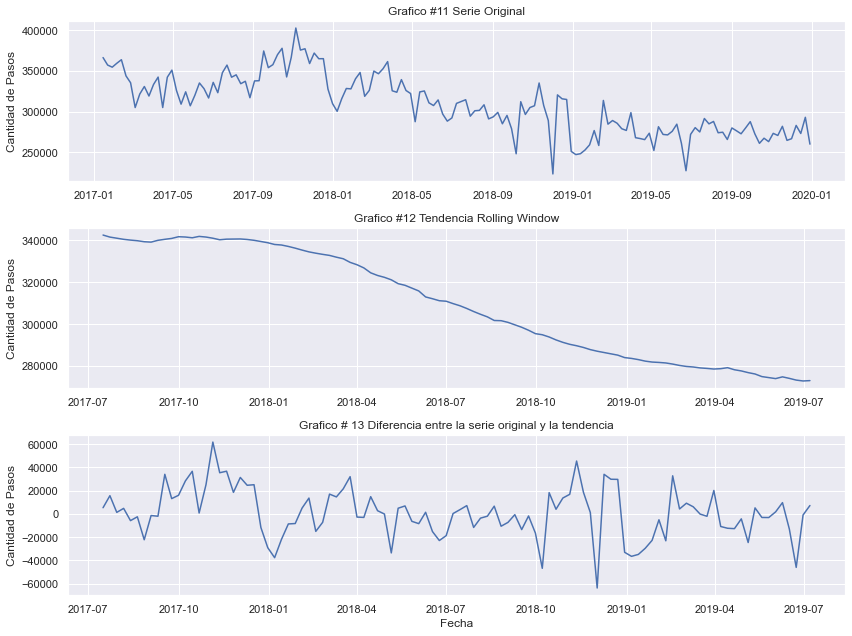

In [50]:
#Grafico #11 #12 #13
plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
plt.title('Grafico #11 Serie Original')
plt.plot(semanal.index, semanal.cantidad_pasos)
plt.ylabel('Cantidad de Pasos')

plt.subplot(3,1,2)
plt.title('Grafico #12 Tendencia Rolling Window')
plt.plot(semanal_promedio_tendencia)
plt.ylabel('Cantidad de Pasos')

plt.subplot(3,1,3)
plt.title('Grafico # 13 Diferencia entre la serie original y la tendencia')
plt.plot(semanal.index, semanal.cantidad_pasos - semanal_promedio_tendencia)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasos')

plt.tight_layout()
plt.show()


In [51]:
#Descomponiendo la serie Semanal
result = seasonal_decompose(semanal.cantidad_pasos, model='additive')
#result.plot()
#pyplot.show()

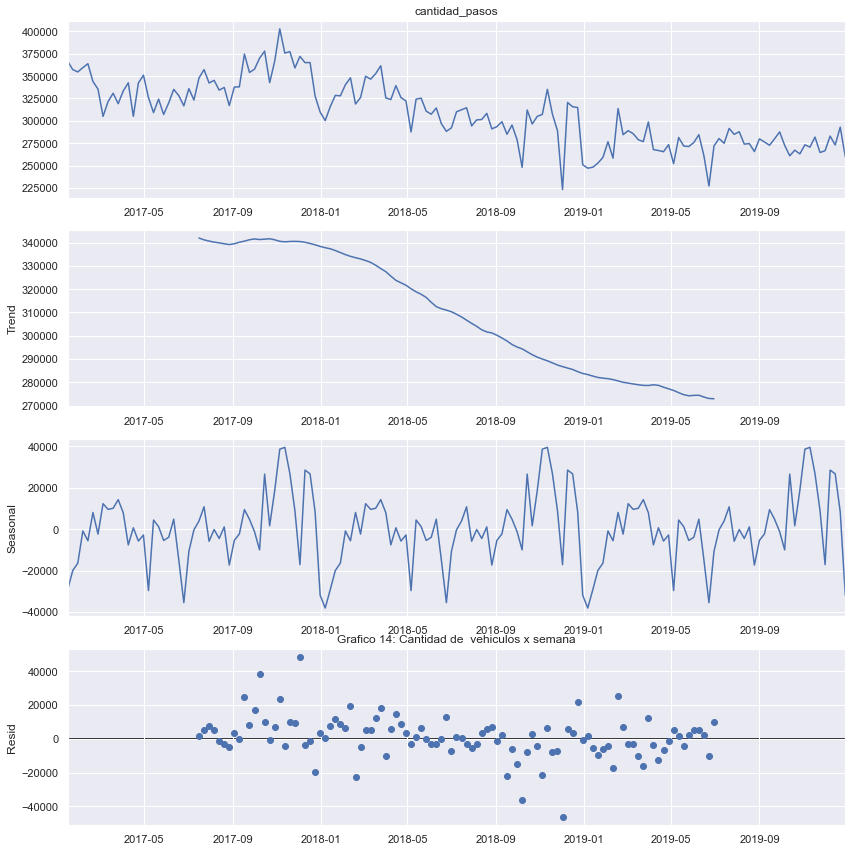

In [52]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.title('Grafico 14: Cantidad de  vehiculos x semana')
plt.show()

Del grafico # 14 se puede observar la serie total, la tendencia la cual como se muestra es decreciente, se puede observar a su vez la estacionalidad la cual es anual y el ruido blanco, el cual no muestra ningun patron.
Es de presumir que cuando se proceda a generar el modelo de prediccion, la tendencia sea decreciente por el tipo de pago que se selecciono 

 ## Predicción con Modelo Arima

In [53]:
#Librerias necesarias 
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [54]:
senial = semanal.cantidad_pasos
senial.head()

fecha
2017-01-15    366413.0
2017-01-22    357215.0
2017-01-29    354581.0
2017-02-05    359401.0
2017-02-12    363774.0
Freq: W-SUN, Name: cantidad_pasos, dtype: float64

In [55]:
#Combinaciones de estacionalidad, tendencia y ruido mediante ARIMA
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [56]:
# Determinando los parametros óptimos para el desempeño del modelo ARIMA
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(senial,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4333.6088614707005
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3895.056348322461
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3338.0712308196985
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:3055.8815808949926
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3354.434296880696
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3332.628253497768
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:3065.055194275071
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:3044.220451524956
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:4199.047965109625
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3845.0742726949634
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3275.488452400314
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2995.7574501187687
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3885.06737192225
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3832.672289909113
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:3032.5107533216506
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2986.19238488363
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:3480.784187723303
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3213.0349333784798
ARIMA

In [57]:
#Encontrando el Modelo ARIMA
mod = sm.tsa.statespace.SARIMAX(senial,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3804      0.143      2.652      0.008       0.099       0.662
ma.L1         -0.7755      0.111     -6.975      0.000      -0.993      -0.558
ar.S.L12      -0.4955      0.105     -4.702      0.000      -0.702      -0.289
sigma2      7.171e+08   3.92e-11   1.83e+19      0.000    7.17e+08    7.17e+08


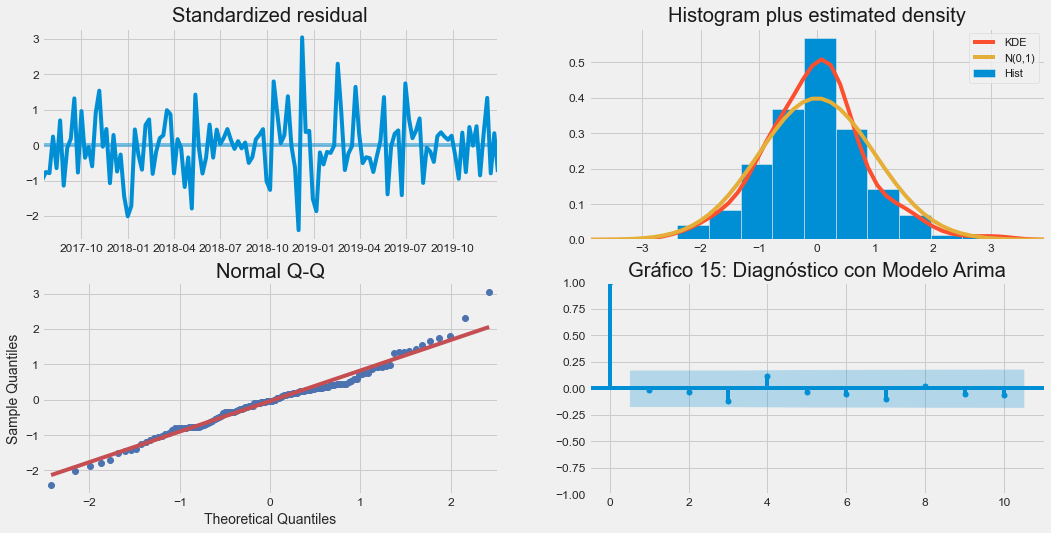

In [58]:
#Gráfico #15 Diagnóstico con Modelo ARIMA
results.plot_diagnostics(figsize=(16, 8))
plt.title('Gráfico 15: Diagnóstico con Modelo Arima')
plt.show()

In [59]:
senial.tail()

fecha
2019-12-01    266555.0
2019-12-08    282891.0
2019-12-15    272960.0
2019-12-22    292881.0
2019-12-29    259830.0
Freq: W-SUN, Name: cantidad_pasos, dtype: float64

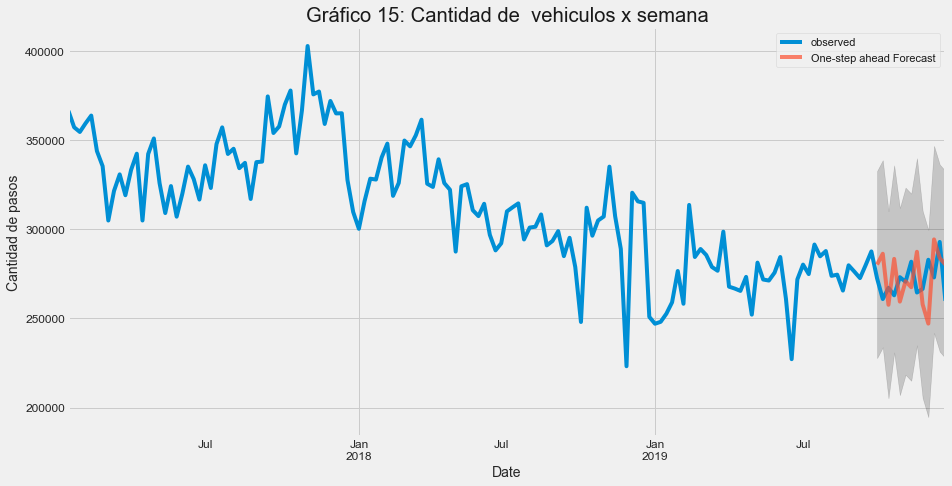

In [60]:
#Predicción  - Modelo ARIMA
pred = results.get_prediction(start=pd.to_datetime('2019-10-06'), dynamic=False)
pred_ci = pred.conf_int()
ax = senial['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Cantidad de pasos')
plt.title('Gráfico 15: Cantidad de  vehiculos x semana')
plt.legend()
plt.show()

In [61]:
#Calculo RMSE - Modelo Arima
y_forecasted = pred.predicted_mean
y_truth = senial['2017-01-01':]
mse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 18475.47


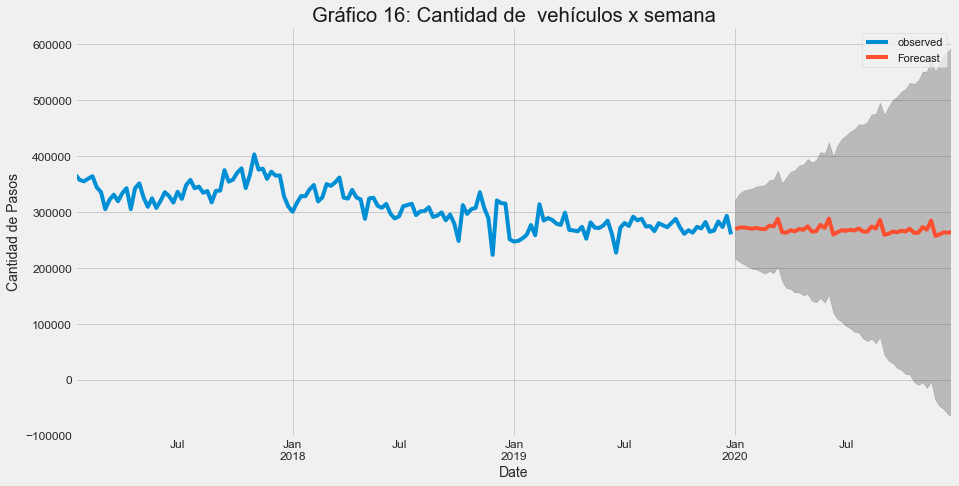

In [62]:
#Predicción  Flujo vehicular 2020 - Modelo ARIMA
pred_uc = results.get_forecast(steps=52)
pred_ci = pred_uc.conf_int()
ax = senial.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Cantidad de Pasos')
plt.title('Gráfico 16: Cantidad de  vehículos x semana')
plt.legend()
plt.show()

In [63]:
pred_ci['mean']= (pred_ci['lower cantidad_pasos']+pred_ci['upper cantidad_pasos'])/2
pred_ci.shape

(52, 3)

In [64]:
pred_ci.drop(columns=['lower cantidad_pasos'], inplace = True)
pred_ci.drop(columns=['upper cantidad_pasos'], inplace = True)

In [65]:
#pred_ci.reset_index(inplace = True)
pred_ci.dropna(inplace=True)

## Modelo 1 Redes Neuronales - Dense

In [66]:
#Importando Librerias 
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('fast')
 
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

In [67]:
print(senial.index.min())
print(senial.index.max())

2017-01-15 00:00:00
2019-12-29 00:00:00


In [68]:
df=senial.copy()

In [69]:
df.head()

fecha
2017-01-15    366413.0
2017-01-22    357215.0
2017-01-29    354581.0
2017-02-05    359401.0
2017-02-12    363774.0
Freq: W-SUN, Name: cantidad_pasos, dtype: float64

In [70]:
# Convirtiendo Series a aprendizaje supervisado- Se dividen los datos en 12 semanas y se normalizan los datos
PASOS=12
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
values = df.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.head()

,var1(t-12),var1(t-11),var1(t-10),var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
12,0.594957,0.492547,0.463221,0.516886,0.565574,0.344044,0.249607,-0.089831,0.094835,0.198380,0.067992,0.226248,0.327588
13,0.492547,0.463221,0.516886,0.565574,0.344044,0.249607,-0.089831,0.094835,0.198380,0.067992,0.226248,0.327588,-0.089786
14,0.463221,0.516886,0.565574,0.344044,0.249607,-0.089831,0.094835,0.198380,0.067992,0.226248,0.327588,-0.089786,0.325651
15,0.516886,0.565574,0.344044,0.249607,-0.089831,0.094835,0.198380,0.067992,0.226248,0.327588,-0.089786,0.325651,0.422749
16,0.565574,0.344044,0.249607,-0.089831,0.094835,0.198380,0.067992,0.226248,0.327588,-0.089786,0.325651,0.422749,0.143613


In [71]:
#Dividemos en set de entrenamiento y validacion 
# split into train and test sets
values = reframed.values
n_train_sem = 109
train = values[:n_train_sem, :]
test = values[n_train_sem:, :]
# split into input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(109, 1, 12) (109,) (34, 1, 12) (34,)


In [72]:
#Creamos el modelo de Red Neuronal - Utilizaremos una Red "normal" Feedforward"
def crear_modeloFF():
    model = Sequential() 
    model.add(Dense(PASOS, input_shape=(1,PASOS),activation='tanh'))
    model.add(Flatten())
    model.add(Dense(1, activation='tanh'))
    model.add(Activation('relu'))
    model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
    model.summary()
    return model

In [73]:
#Entrenamos el Modelo de Red Neuronal

EPOCHS=40

model = crear_modeloFF()

history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=PASOS)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 12)             156       
_________________________________________________________________
flatten (Flatten)            (None, 12)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
10/10 [==============================] - 9s 592ms/step - loss: 0.2691 - mse: 0.1139 - val_loss: 0.4386 - val_mse: 0.2096
Epoch 2/40
10/10 [==============================] - 0s 13ms/step - loss: 0.2644 - mse: 0.1134 - val_loss: 0.4386 - val_mse: 

34


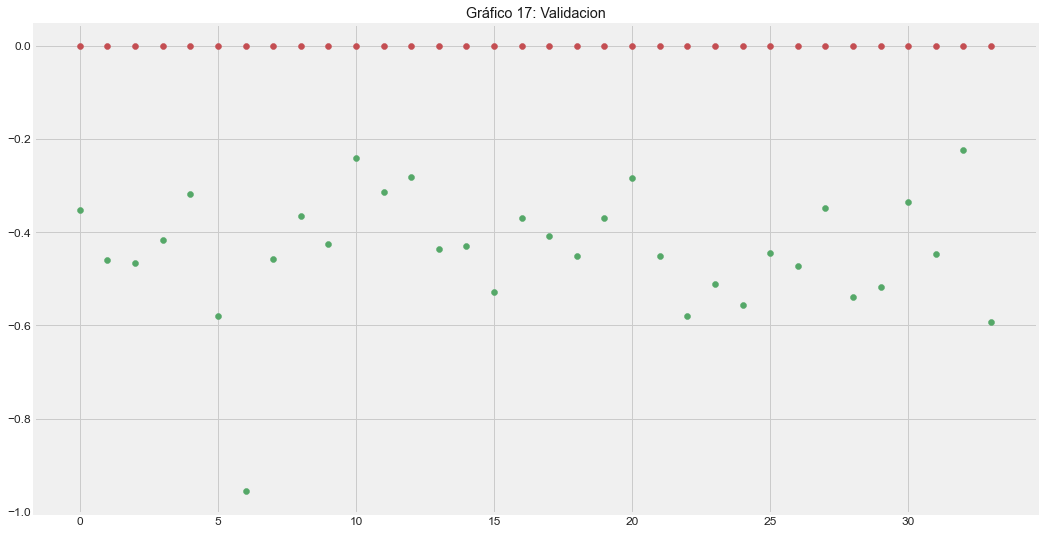

In [74]:
#visualizamos resultados
results=model.predict(x_val,batch_size=PASOS)
print(len(results) )
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('Gráfico 17: Validacion')
plt.show()

 Del grafico #17 se puede concluir que los valores de test estan alejados de los valores resultado

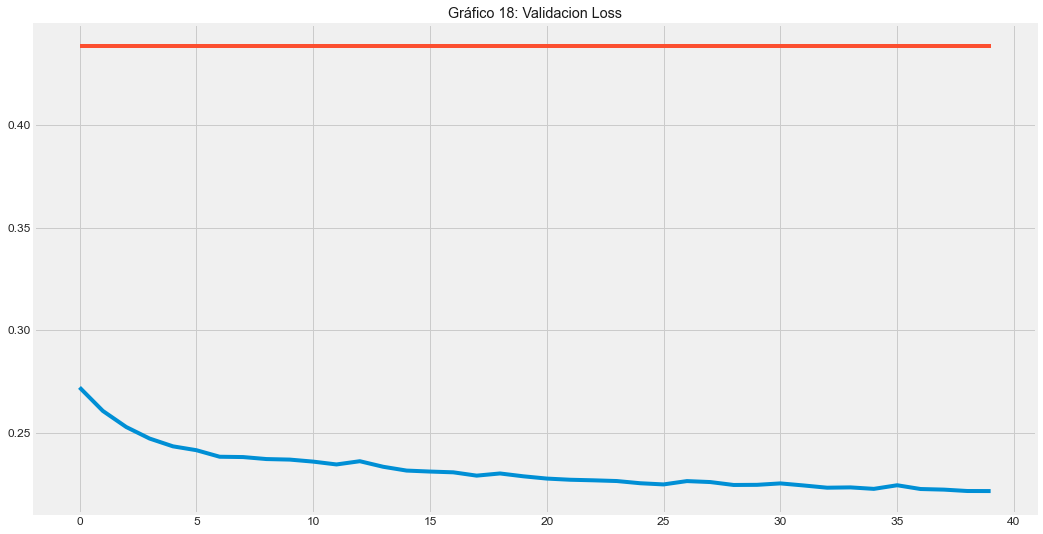

In [75]:
#Graficamos Loss y val-loss de la red obtenida
plt.plot(history.history['loss'])
plt.title('loss')
plt.plot(history.history['val_loss'])
plt.title('Gráfico 18: Validacion Loss')
plt.show()

Del grafico #18, se puede comparar como disminuye los valores de error tanto para Loss(vaores de entranmiento) como val loss(valores de validacion), pareciera no hay sobreentranmiento ya que las curvas son distintas 

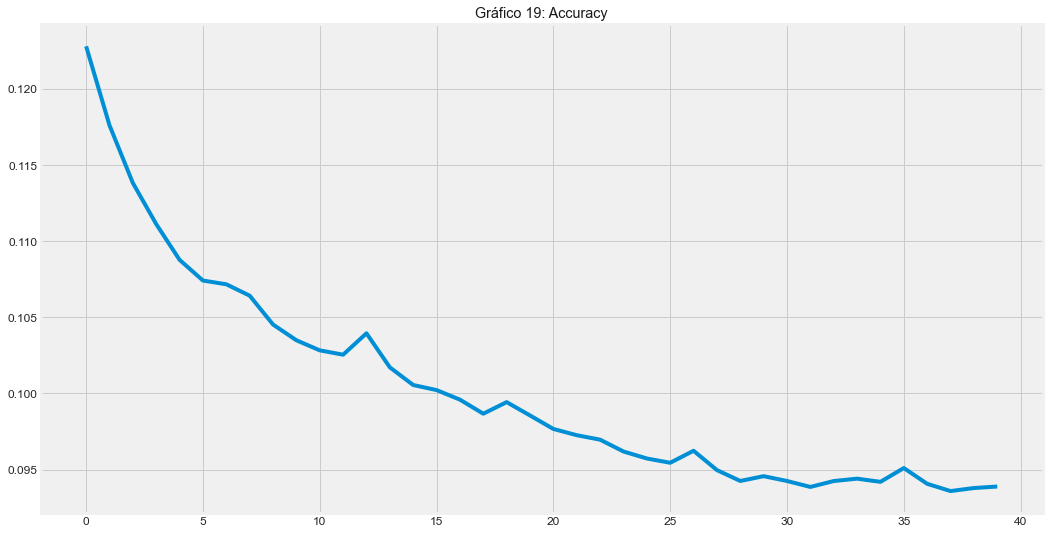

In [76]:
#Graficamos el accurracy
plt.title('Accuracy')
plt.plot(history.history['mse'])
plt.title('Gráfico 19: Accuracy')
plt.show()

In [77]:
#Comparando valores reales vs predichos 
compara = pd.DataFrame(np.array([y_val, [x[0] for x in results]])).transpose()
compara.columns = ['real', 'prediccion']

inverted = scaler.inverse_transform(compara.values)

compara2 = pd.DataFrame(inverted)
compara2.columns = ['real', 'prediccion']
compara2['diferencia'] = compara2['real'] - compara2['prediccion']
compara2.head()

,real,prediccion,diferencia
0,281283.0,312976.25,-31693.25
1,271796.0,312976.25,-41180.25
2,271232.0,312976.25,-41744.25
3,275654.5,312976.25,-37321.75
4,284432.0,312976.25,-28544.25


In [78]:
compara2.describe()

,real,prediccion,diferencia
count,34.000000,34.00000,34.000000
mean,273587.156250,312976.12500,-39389.117188
std,11965.816406,0.12688,11965.816406
min,227123.000000,312976.25000,-85853.250000
25%,267994.250000,312976.25000,-44982.000000
50%,273498.000000,312976.25000,-39478.250000
75%,281002.250000,312976.25000,-31974.000000
max,292881.000000,312976.25000,-20095.250000


Text(0.5, 1.0, 'Gráfico 20: Red Neuronal:Real vs predicción')

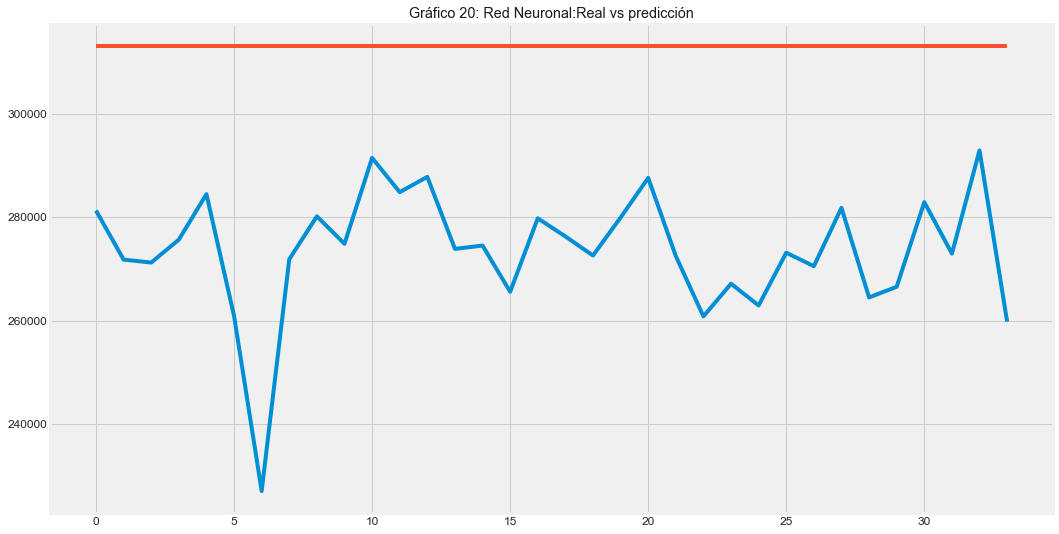

In [79]:
compara2['real'].plot()
compara2['prediccion'].plot()
plt.title('Gráfico 20: Red Neuronal:Real vs predicción')

#### Pronóstico de flujo vehicular 

In [80]:
ultimassemanas = df['2018-10-08':'2019-12-29']
ultimassemanas.size

64

Se continuara con el mismo preprocesado de datos que hicimos para el entrenamiento: escalando los valores, llamando a la función series_to_supervised, y no se incluye Y ya que es la que ueremos determinar. 

In [81]:
values = ultimassemanas.values
values = values.astype('float32')
# normalize features
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.drop(reframed.columns[[12]], axis=1, inplace=True)
reframed.head(12)

,var1(t-12),var1(t-11),var1(t-10),var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
12,0.588642,0.308032,0.460163,0.500125,1.000000,0.504019,0.174997,-1.000000,0.738558,0.652167,0.637643,-0.505145
13,0.308032,0.460163,0.500125,1.000000,0.504019,0.174997,-1.000000,0.738558,0.652167,0.637643,-0.505145,-0.574225
14,0.460163,0.500125,1.000000,0.504019,0.174997,-1.000000,0.738558,0.652167,0.637643,-0.505145,-0.574225,-0.554879
15,0.500125,1.000000,0.504019,0.174997,-1.000000,0.738558,0.652167,0.637643,-0.505145,-0.574225,-0.554879,-0.473775
16,1.000000,0.504019,0.174997,-1.000000,0.738558,0.652167,0.637643,-0.505145,-0.574225,-0.554879,-0.473775,-0.359409
17,0.504019,0.174997,-1.000000,0.738558,0.652167,0.637643,-0.505145,-0.574225,-0.554879,-0.473775,-0.359409,-0.045911
18,0.174997,-1.000000,0.738558,0.652167,0.637643,-0.505145,-0.574225,-0.554879,-0.473775,-0.359409,-0.045911,-0.373969
19,-1.000000,0.738558,0.652167,0.637643,-0.505145,-0.574225,-0.554879,-0.473775,-0.359409,-0.045911,-0.373969,0.616421
20,0.738558,0.652167,0.637643,-0.505145,-0.574225,-0.554879,-0.473775,-0.359409,-0.045911,-0.373969,0.616421,0.094698
21,0.652167,0.637643,-0.505145,-0.574225,-0.554879,-0.473775,-0.359409,-0.045911,-0.373969,0.616421,0.094698,0.174729


In [82]:
values = reframed.values
x_test = values[11:, :]
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
print(x_test.shape)
x_test

(41, 1, 12)


array([[[-0.5051451 , -0.5742254 , -0.5548787 , -0.4737754 ,
         -0.35940933, -0.04591084, -0.3739686 ,  0.61642075,
          0.09469795,  0.17472935,  0.11449146, -0.0054307 ]],

       [[-0.5742254 , -0.5548787 , -0.4737754 , -0.35940933,
         -0.04591084, -0.3739686 ,  0.61642075,  0.09469795,
          0.17472935,  0.11449146, -0.0054307 , -0.04330301]],

       [[-0.5548787 , -0.4737754 , -0.35940933, -0.04591084,
         -0.3739686 ,  0.61642075,  0.09469795,  0.17472935,
          0.11449146, -0.0054307 , -0.04330301,  0.348351  ]],

       [[-0.4737754 , -0.35940933, -0.04591084, -0.3739686 ,
          0.61642075,  0.09469795,  0.17472935,  0.11449146,
         -0.0054307 , -0.04330301,  0.348351  , -0.20259762]],

       [[-0.35940933, -0.04591084, -0.3739686 ,  0.61642075,
          0.09469795,  0.17472935,  0.11449146, -0.0054307 ,
         -0.04330301,  0.348351  , -0.20259762, -0.22139072]],

       [[-0.04591084, -0.3739686 ,  0.61642075,  0.09469795,
         

In [83]:
def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i] = x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test

In [84]:
results=[]
for i in range(52):
    parcial=model.predict(x_test,batch_size=PASOS)
    results.append(parcial[0])
    print(x_test)
    x_test=agregarNuevoValor(x_test,parcial[0])

[[[-0.5051451  -0.5742254  -0.5548787  -0.4737754  -0.35940933
   -0.04591084 -0.3739686   0.61642075  0.09469795  0.17472935
    0.11449146 -0.0054307 ]]

 [[-0.5742254  -0.5548787  -0.4737754  -0.35940933 -0.04591084
   -0.3739686   0.61642075  0.09469795  0.17472935  0.11449146
   -0.0054307  -0.04330301]]

 [[-0.5548787  -0.4737754  -0.35940933 -0.04591084 -0.3739686
    0.61642075  0.09469795  0.17472935  0.11449146 -0.0054307
   -0.04330301  0.348351  ]]

 [[-0.4737754  -0.35940933 -0.04591084 -0.3739686   0.61642075
    0.09469795  0.17472935  0.11449146 -0.0054307  -0.04330301
    0.348351   -0.20259762]]

 [[-0.35940933 -0.04591084 -0.3739686   0.61642075  0.09469795
    0.17472935  0.11449146 -0.0054307  -0.04330301  0.348351
   -0.20259762 -0.22139072]]

 [[-0.04591084 -0.3739686   0.61642075  0.09469795  0.17472935
    0.11449146 -0.0054307  -0.04330301  0.348351   -0.20259762
   -0.22139072 -0.24500704]]

 [[-0.3739686   0.61642075  0.09469795  0.17472935  0.11449146
   -0

In [85]:
#Reconvertimos los datos
adimen = [x for x in results]    
print(adimen)
inverted = scaler.inverse_transform(adimen)
inverted.tolist()

[array([0.], dtype=float32), array([0.14653517], dtype=float32), array([0.], dtype=float32), array([0.31698605], dtype=float32), array([0.0296177], dtype=float32), array([0.2720737], dtype=float32), array([0.], dtype=float32), array([0.20963877], dtype=float32), array([0.], dtype=float32), array([0.18810469], dtype=float32), array([0.], dtype=float32), array([0.22607838], dtype=float32), array([0.], dtype=float32), array([0.23164603], dtype=float32), array([0.], dtype=float32), array([0.23141703], dtype=float32), array([0.], dtype=float32), array([0.23586565], dtype=float32), array([0.], dtype=float32), array([0.24446674], dtype=float32), array([0.], dtype=float32), array([0.2477786], dtype=float32), array([0.], dtype=float32), array([0.25591406], dtype=float32), array([0.], dtype=float32), array([0.2642403], dtype=float32), array([0.], dtype=float32), array([0.2727951], dtype=float32), array([0.], dtype=float32), array([0.2809623], dtype=float32), array([0.], dtype=float32), array([0.

[[279138.0045555786],
 [287340.7507455],
 [279138.0045555786],
 [296882.2504859521],
 [280795.9442618751],
 [294368.1458632312],
 [279138.0045555786],
 [290873.1642584416],
 [279138.0045555786],
 [289667.72919294983],
 [279138.0045555786],
 [291793.42031739163],
 [279138.0045555786],
 [292105.08651750354],
 [279138.0045555786],
 [292092.26749656803],
 [279138.0045555786],
 [292341.2924931926],
 [279138.0045555786],
 [292822.76400901505],
 [279138.0045555786],
 [293008.15517884976],
 [279138.0045555786],
 [293463.5624086771],
 [279138.0045555786],
 [293929.64826331043],
 [279138.0045555786],
 [294408.52978303673],
 [279138.0045555786],
 [294865.7120568875],
 [279138.0045555786],
 [295428.8581194889],
 [279138.0045555786],
 [295997.6863248944],
 [279138.0045555786],
 [296602.3273780904],
 [279138.0045555786],
 [297225.1859883681],
 [279138.0045555786],
 [297882.13078237226],
 [279138.0045555786],
 [298543.9502743428],
 [279138.0045555786],
 [299219.24108256184],
 [279138.0045555786],
 [2

Text(0.5, 1.0, 'Grafico 21: Pronostico - Red Neuronal Modelo 1 ')

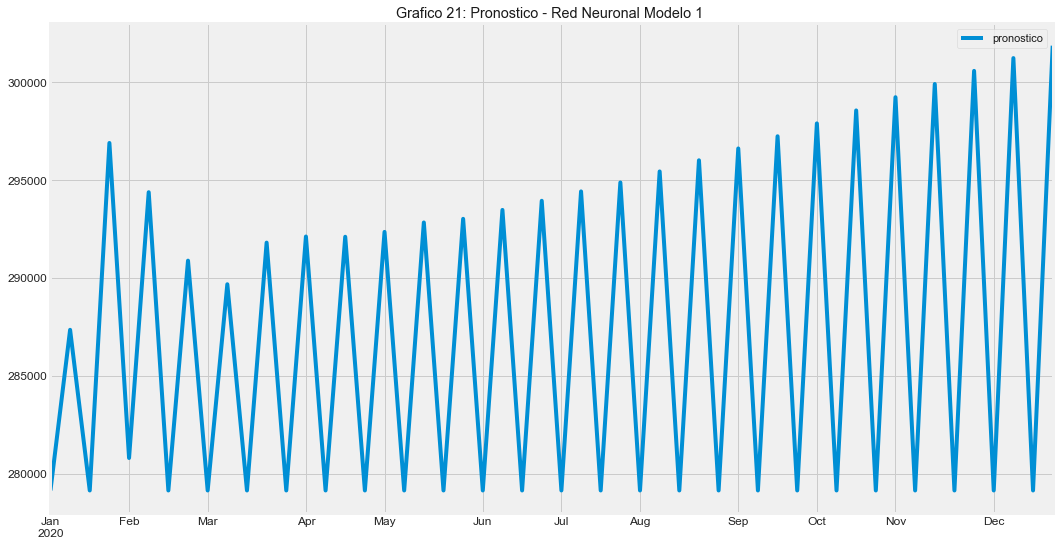

In [86]:
prediccionSemanas = pd.DataFrame(inverted,index=pd.date_range(start='2020/1/05', periods=52, freq='W'))
prediccionSemanas.columns = ['pronostico']
prediccionSemanas.plot()
plt.title('Grafico 21: Pronostico - Red Neuronal Modelo 1 ')
#prediccion1SemanaDiciembre.to_csv('pronostico.csv')

In [87]:
prediccionSemanas.head()

,pronostico
2020-01-05,279138.004556
2020-01-12,287340.750745
2020-01-19,279138.004556
2020-01-26,296882.250486
2020-02-02,280795.944262


In [88]:
prediccionSemanas.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52 entries, 2020-01-05 to 2020-12-27
Freq: W-SUN
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pronostico  52 non-null     float64
dtypes: float64(1)
memory usage: 832.0 bytes


In [89]:
df=pd.DataFrame(df)
df

,cantidad_pasos
fecha,
2017-01-15,366413.0
2017-01-22,357215.0
2017-01-29,354581.0
2017-02-05,359401.0
2017-02-12,363774.0
...,...
2019-12-01,266555.0
2019-12-08,282891.0
2019-12-15,272960.0


## Modelo 2 Red Neuronal multi-layered LSTM

In [90]:
# Seleccionando los datos de test y entrenamiento de la red neuronal
dataset = df.cantidad_pasos.values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.59)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [91]:
len(dataset)

155

In [92]:
test.size

64

In [93]:
train.size

91

In [94]:
# Convirtiebdo un array a una matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [95]:
# reshape into X=t and Y=t+1
look_back = 12
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

In [96]:
X_train.shape

(78, 12)

In [97]:
X_test.shape

(51, 12)

In [98]:
# reshape 
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [99]:
#Definiendo el Modelo 2 de Redes Neuronales LSTM
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=40, batch_size=70, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

# Training Phase
model.summary()

Epoch 1/40
2/2 [==============================] - 8s 1s/step - loss: 0.3473 - val_loss: 0.0605
Epoch 2/40
2/2 [==============================] - 0s 86ms/step - loss: 0.2906 - val_loss: 0.0463
Epoch 3/40
2/2 [==============================] - 0s 86ms/step - loss: 0.2165 - val_loss: 0.0345
Epoch 4/40
2/2 [==============================] - 0s 86ms/step - loss: 0.1583 - val_loss: 0.0251
Epoch 5/40
2/2 [==============================] - 0s 84ms/step - loss: 0.1165 - val_loss: 0.0179
Epoch 6/40
2/2 [==============================] - 0s 84ms/step - loss: 0.0874 - val_loss: 0.0128
Epoch 7/40
2/2 [==============================] - 0s 111ms/step - loss: 0.0548 - val_loss: 0.0098
Epoch 8/40
2/2 [==============================] - 0s 101ms/step - loss: 0.0348 - val_loss: 0.0085
Epoch 9/40
2/2 [==============================] - 0s 100ms/step - loss: 0.0226 - val_loss: 0.0086
Epoch 10/40
2/2 [==============================] - 0s 89ms/step - loss: 0.0148 - val_loss: 0.0098
Epoch 11/40
2/2 [===========

In [100]:
# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

Train Mean Absolute Error: 16085.54970062222
Train Root Mean Squared Error: 20858.856528605418
Test Mean Absolute Error: 14250.725808932404
Test Root Mean Squared Error: 19339.16398522553


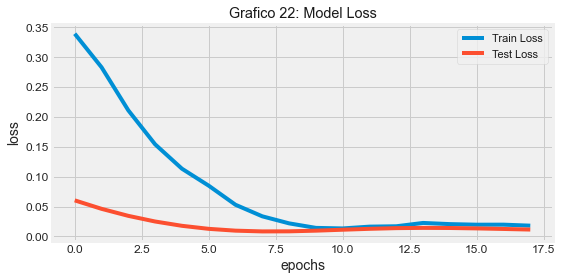

In [101]:
#Grafico #22 Graficando Train y Test Loss
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.title('Grafico 22: Model Loss')
plt.show()

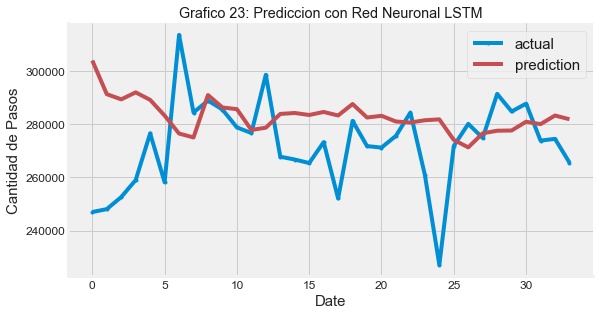

In [102]:
#Graficando los datos reales y la prediccion con red neuronal LSTM
aa=[x for x in range(34)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:34], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:34], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Cantidad de Pasos', size=15)
plt.xlabel('Date', size=15)
plt.title('Grafico 23: Prediccion con Red Neuronal LSTM')
plt.legend(fontsize=15)
plt.show();

<AxesSubplot:>

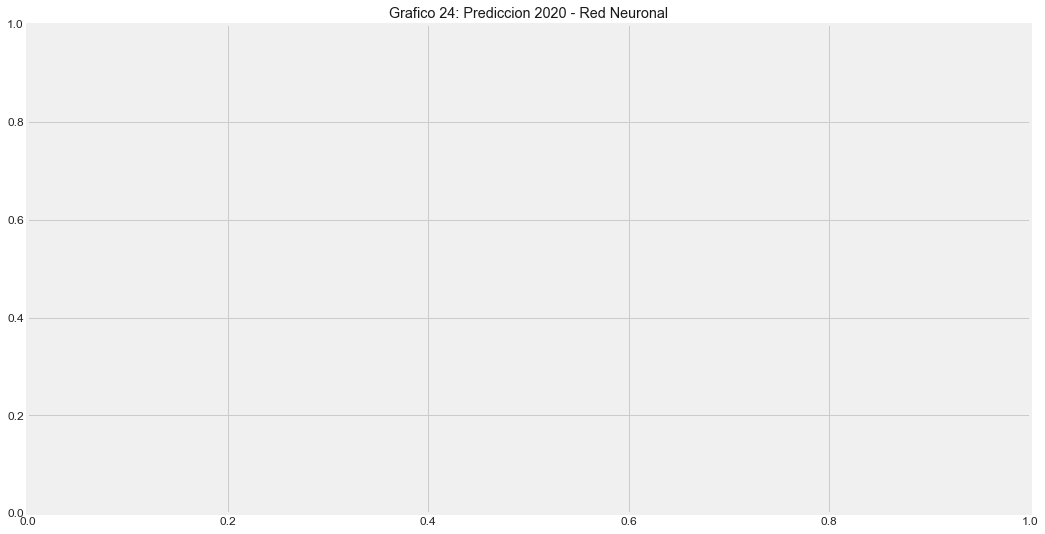

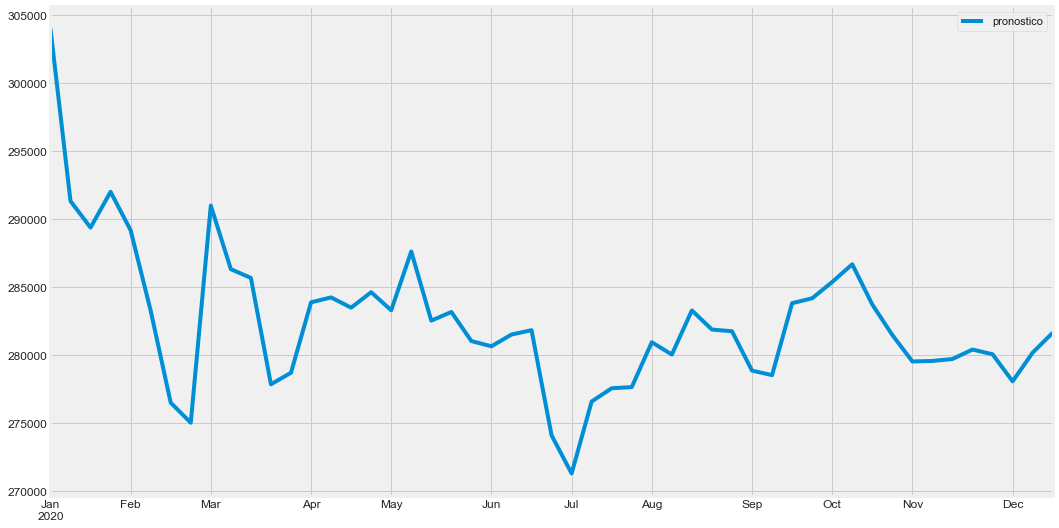

In [103]:
#Grafico #24 Del Modelo Red Neuronal LSTM
test_predict = pd.DataFrame(test_predict,index=pd.date_range(start='2020/1/05', periods=51, freq='W'))
test_predict.columns = ['pronostico']
plt.title('Grafico 24: Prediccion 2020 - Red Neuronal')
test_predict.plot()

## Comparando Resultado de los Modelos Desarrollados vs Datos Reales

In [104]:
#Incluyendo los datos del flujo vehicular 2020
data_2020 = pd.read_csv('flujo-vehicular-2020 (1).csv', sep =',')

In [105]:
data_2020.head()

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Centro,24.0
1,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80.0
2,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1.0
3,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1.0
4,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1.0


In [106]:
#Quitamos las columnas que no vamos a utilizar
data_2020.drop(columns = ['mes','dia_fecha','observacion'], inplace = True)

In [107]:
#Reemplazamos 
data_2020['estacion'].replace('ILLIA','Illia', inplace = True)
data_2020['forma_pago'].replace('Efectivo','EFECTIVO', inplace = True)

In [108]:
mask_1 = np.logical_and(data_2020.estacion=='Illia', data_2020.forma_pago == 'EFECTIVO')
data_2020 = data_2020[mask_1]

In [109]:

#Quitamos las columnas que no vamos a utilizar
data_2020.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)


In [110]:
data_2020.head()

,fecha,dia,hora_fin,tipo_vehiculo,sentido,cantidad_pasos
52,2020-01-01 00:00:00,Miércoles,1.0,Auto,Centro,326.0
53,2020-01-01 00:00:00,Miércoles,1.0,Auto,Provincia,319.0
134,2020-01-01 00:00:00,Miércoles,2.0,Auto,Centro,199.0
135,2020-01-01 00:00:00,Miércoles,2.0,Auto,Provincia,180.0
202,2020-01-01 00:00:00,Miércoles,3.0,Auto,Centro,114.0


In [111]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
data_2020['fecha2'] = pd.to_datetime(data_2020.fecha) + pd.to_timedelta(data_2020.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2

data_2020.drop(columns=['fecha'], inplace = True)
data_2020.drop(columns=['hora_fin'], inplace = True)
data_2020.rename(columns = {'fecha2':'fecha'}, inplace = True) 
data_2020.head()

,dia,tipo_vehiculo,sentido,cantidad_pasos,fecha
52,Miércoles,Auto,Centro,326.0,2020-01-01 01:00:00
53,Miércoles,Auto,Provincia,319.0,2020-01-01 01:00:00
134,Miércoles,Auto,Centro,199.0,2020-01-01 02:00:00
135,Miércoles,Auto,Provincia,180.0,2020-01-01 02:00:00
202,Miércoles,Auto,Centro,114.0,2020-01-01 03:00:00


In [112]:
#Reordenamos el dataset por fecha
data_2020.sort_values('fecha', inplace = True, ascending=True)
data_2020.reset_index(drop=True, inplace = True)
data_2020

,dia,tipo_vehiculo,sentido,cantidad_pasos,fecha
0,Miércoles,Moto,Centro,7.0,2020-01-01 00:00:00
1,Miércoles,Auto,Provincia,423.0,2020-01-01 00:00:00
2,Miércoles,Auto,Centro,467.0,2020-01-01 00:00:00
3,Miércoles,Moto,Provincia,6.0,2020-01-01 00:00:00
4,Miércoles,Pesados 2 Ejes,Centro,1.0,2020-01-01 00:00:00
...,...,...,...,...,...
52369,Jueves,Auto,Provincia,222.0,2020-12-31 20:00:00
52370,Jueves,Auto,Provincia,106.0,2020-12-31 21:00:00
52371,Jueves,Moto,Centro,5.0,2020-12-31 21:00:00
52372,Jueves,Moto,Provincia,1.0,2020-12-31 21:00:00


In [113]:
#Filtrando el dataset de prueba
aux_4 = data_2020[(data_2020['fecha'] <= "2020-12-26")]
df_analisis_4 = aux_4.set_index("fecha")
df_analisis_4.reset_index(inplace = True)
df_analisis_4 [:3]

,fecha,dia,tipo_vehiculo,sentido,cantidad_pasos
0,2020-01-01,Miércoles,Moto,Centro,7.0
1,2020-01-01,Miércoles,Auto,Provincia,423.0
2,2020-01-01,Miércoles,Auto,Centro,467.0


In [114]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
semanal_4 = df_analisis_4.resample('W', on = 'fecha').sum()
print(semanal_4.shape)
semanal_4.head()

(52, 1)


,cantidad_pasos
fecha,
2020-01-05,150623.0
2020-01-12,243359.0
2020-01-19,246818.0
2020-01-26,241192.0
2020-02-02,253335.0


In [115]:
semanal_4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52 entries, 2020-01-05 to 2020-12-27
Freq: W-SUN
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cantidad_pasos  52 non-null     float64
dtypes: float64(1)
memory usage: 832.0 bytes


In [116]:
semanal_4.columns

Index(['cantidad_pasos'], dtype='object')

In [117]:
pred_ci.size

52

In [118]:
#Importando datos Prediccion con  Modelo Prophet
Prophet_20 = pd.read_csv('Prophet_2020.csv',index_col='ds')
Prophet_20=Prophet_20[['yhat']]
#Prophet_20.set_index('ds')
Prophet_20.head()

,yhat
ds,
2020-01-12,243316.046880
2020-01-19,253896.514699
2020-01-26,265968.515948
2020-02-02,271935.398016
2020-02-09,271056.887601


In [119]:
Prophet_20.index= pd.to_datetime(Prophet_20.index)

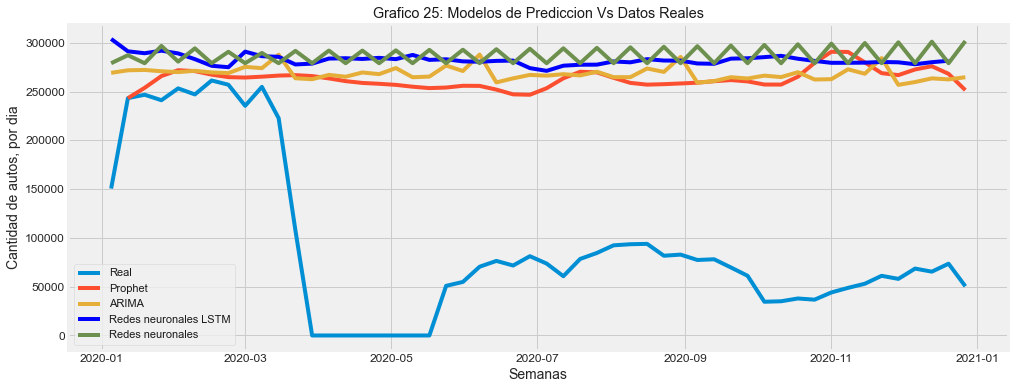

In [120]:
#Gráfico #25
plt.figure(figsize = (15,6))
plt.plot(semanal_4.index, semanal_4.cantidad_pasos, label='Real')
plt.plot(Prophet_20, label='Prophet')
plt.plot(pred_ci, label='ARIMA')
plt.plot(test_predict, 'blue', label='Redes neuronales LSTM')
plt.plot(prediccionSemanas, label='Redes neuronales')
plt.xlabel('Semanas')
plt.ylabel('Cantidad de autos, por dia')
plt.title('Grafico 25: Modelos de Prediccion Vs Datos Reales')
plt.legend()
plt.show()

# Conclusiones 

Este proyecto de mejora incluyo la predicción del flujo vehicular 2020, utilizando Redes neuronales y el modelo de Arima, luego se procedio a comparar con el modelo Prophet del proyecto #3, de los resultados obtenidos se puede concluir que con respecto a la métrica evaluada RMSE, el modelo que presento mejor métrica es el prophet.

Prophet: 17486.34
ARIMA: 18475.47
Red Neuronal LSTM: 19664.83

Conforme con el grafico#25, se puede observar que se incluyeron los datos reales del flujo vehicular para el 2020 y se observa que de los modelos desarrollados ninguno refleja la tendencia real de los datos.

Como proximos pasos se procedera a trabajar en la optimizacion de hiperparametros en las redes neuronales y utilizar otros modelos de redes para mejorar los valores RMSE. 


Link proyecto #4  https://github.com/Esmefiallo/Proyecto-4
Link proyecto #3  https://github.com/Esmefiallo/Proyecto-3-Esme